<div style="text-align: center; color: #7896cf; font-size: 32px; font-weight: bold; font-family: Arial, Helvetica, sans-serif; padding-bottom: 12px;">PODSTAWY PROGRAMOWANIA 1</div>
<div style="text-align: center; color: #3c3c4c; font-size: large; font-family:monospace; padding-bottom:18px;"> andrzej.buchowicz@pw.edu.pl</div>
<div style="text-align: center; font-size: 48px; font-family: Arial, Helvetica, sans-serif; padding-bottom: 24px; line-height: 1.25;">Przesyłanie danych w sieciach komputerowych z wykorzystaniem pakietów <span style="color: #000080;">urllib</span>, <span style="color: #000080;">requests</span></div>

## Pakiet [`urllib`](https://docs.python.org/3/library/urllib.html)

* znajduje się w standardowej bibliotece języka Python - jest instalowany razem z interpeterem
* zapewnia:
  * pobieranie/wysyłanie danych przy użyciu protokołów sieciowych (przede wszystkim HTTP)
  * parsowanie identyfikatorów URL (*Uniform Resource Locator*)

In [9]:
import urllib

url = urllib.parse.urlparse("https://gitlab-stud.elka.pw.edu.pl:443/users/sign_in")

print(url.scheme, '\n', url.hostname, '\n', url.port, '\n', url.path)

https 
 gitlab-stud.elka.pw.edu.pl 
 443 
 /users/sign_in


## Pakiet `requests`



*   pełna obsługa protokołu HTTP
*   prosty interfejs programistyczny (API)


### Instalacja

* standardowo instalowany w dystrybucji Anaconda
* w pozostałych dystrybucjach moze być zainstalowany poleceniem:
```
pip install requests
```



### Pobieranie danych tekstowych z serwisu sieciowego - metoda GET

[requests API](https://docs.python-requests.org/en/latest/api/)


In [14]:
import requests

response = requests.get("https://jsonplaceholder.typicode.com/posts/1")    # https://jsonplaceholder.typicode.com/
response

<Response [200]>

#### klasa [requests.Response](https://docs.python-requests.org/en/latest/api/#requests.Response)

##### Status

In [15]:
if response:
  print("OK")
else:
  print("Error")

OK


In [16]:
response.status_code

200

##### Nagłówki

In [17]:
response.headers

{'Date': 'Fri, 19 Jan 2024 09:37:58 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Powered-By': 'Express', 'X-Ratelimit-Limit': '1000', 'X-Ratelimit-Remaining': '999', 'X-Ratelimit-Reset': '1699595930', 'Vary': 'Origin, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'max-age=43200', 'Pragma': 'no-cache', 'Expires': '-1', 'X-Content-Type-Options': 'nosniff', 'Etag': 'W/"124-yiKdLzqO5gfBrJFrcdJ8Yq0LGnU"', 'Via': '1.1 vegur', 'CF-Cache-Status': 'HIT', 'Age': '12551', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=kliSi043ZHzZV65EBLRQ4oHPvuhpSXxAePpwMyZc9%2FstrKAJVIWooNb%2Fd%2BnLTJBLXRxBkMq0lgyz%2F8yGrbCiXTMrRQeH0y09p%2BxOS6PsCuaEo4%2FvoLc37iuJtYtVuw1V9fzqqX%2BYxOgS%2Bzd%2FMNeL"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Server': 'cloudflare', 'CF-RAY': '847e1a21da3cbf24-WAW', 'Cont

In [18]:
response.headers['Content-Type']

'application/json; charset=utf-8'

##### Zawartość

In [19]:
response.content

b'{\n  "userId": 1,\n  "id": 1,\n  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",\n  "body": "quia et suscipit\\nsuscipit recusandae consequuntur expedita et cum\\nreprehenderit molestiae ut ut quas totam\\nnostrum rerum est autem sunt rem eveniet architecto"\n}'

In [20]:
type(response.content)

bytes

In [21]:
text = response.content.decode("utf-8")
text

'{\n  "userId": 1,\n  "id": 1,\n  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",\n  "body": "quia et suscipit\\nsuscipit recusandae consequuntur expedita et cum\\nreprehenderit molestiae ut ut quas totam\\nnostrum rerum est autem sunt rem eveniet architecto"\n}'

In [23]:
import json

data = json.loads(text)
data

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [24]:
data['id']

1

### Pobieranie danych binarnych - metoda GET

In [25]:
url = "https://zim.ire.pw.edu.pl/wp-content/uploads/2020/11/kwao_img1.png"
response = requests.get(url)

response.headers

{'Server': 'nginx', 'Date': 'Fri, 19 Jan 2024 09:42:59 GMT', 'Content-Type': 'image/png', 'Content-Length': '204685', 'Connection': 'keep-alive', 'Last-Modified': 'Fri, 13 Nov 2020 12:42:18 GMT', 'ETag': '"5fae7f2a-31f8d"', 'Accept-Ranges': 'bytes'}

In [26]:
response.content[:500]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xa2\x00\x00\x00\xf2\x08\x06\x00\x00\x00\x0f\xf2\xc1,\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\xff\xa5IDATx^\xec\xfd\xe5\xb7$W\x96\xed\x89\xba\x9b\xe3af\xe68\xc1\xcc\xcc\xcc\xcc\xcc\xccLR03(P\x1c\n)\xc5\x99R*\x95)H\xa8\xcc\xaa\xac\xaa[]=\xfav\xbf\xaa\xbe\xa3_\x8f\xee\x0fo\xbc\xffa\xbe9\x97\xd9>rE\x86\x94\x92\xb2\xfa}\xca3\xc6\x1a\x1b\xcd\xdc\xdc\x8f\xfb\xfe\xd9\\{\xedm\xa1\xbf\xff\xfd\xfd\xef\xef\x7f\x7f\xff\xfb\xfb\xdf\xdf\xff\xfe\xfe\xf7\xf7\xbf\xbf\xff\xfd\xfd\xef\xef\x7f\x7f\xff\xfb\xfb\xdf3\x7f\xe1\xc0\xbc\xbf\xdb\xdf\xed\xef\xf6w\xfb\xbb\xfd\xdd\xfe\x0b\xccq\xe5\xfb\xff\xc2\x89]\x08\'\x0e\xc3K\xbf\x8aX\xce\xebH\x14\xbc\x85x\xc1ED\x8a\xd6 T6\x9d6\x8d63\xb0Y)\xf9\x1fi\xa5)i\t\xadb&\xc2Ms\x10\xae\x9b\xed\x97S\xdb\xaaf!\xdc<\x07\xa1j\xbe^1\xaf\xa1Re\xf6\xabf[\xf5l;.T\xc1\xba\xba\xe5\xb4\xa5\x08\x95\xf3<\r+\x10n\xbf

In [29]:
import os


filename = os.path.basename(urllib.parse.urlparse(url).path)
print(filename)

kwao_img1.png


In [30]:
with open(os.path.join('data', filename), 'wb') as file:
    file.write(response.content)

## Python - wyświetlanie obrazów

* pakiet `matplotlib`
  * [imread()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)
  * [imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
* biblioteka [OpenCV](https://opencv.org/)
* biblioteka [Pillow](https://pillow.readthedocs.io/en/stable/)

<class 'numpy.ndarray'> (242, 418, 4)


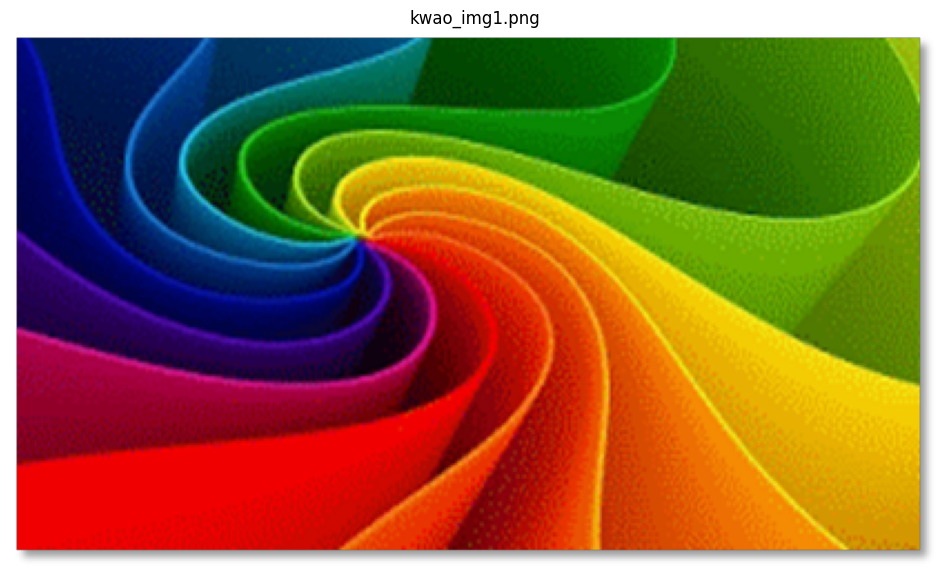

In [33]:
import matplotlib.pyplot as plt

img = plt.imread(os.path.join('data', filename))
print(type(img), img.shape)

_, ax = plt.subplots(figsize=(12, 9))
ax.imshow(img)
ax.set_axis_off()
ax.set_title(filename);

##### [io.BytesIO](https://docs.python.org/3/library/io.html#io.BytesIO)

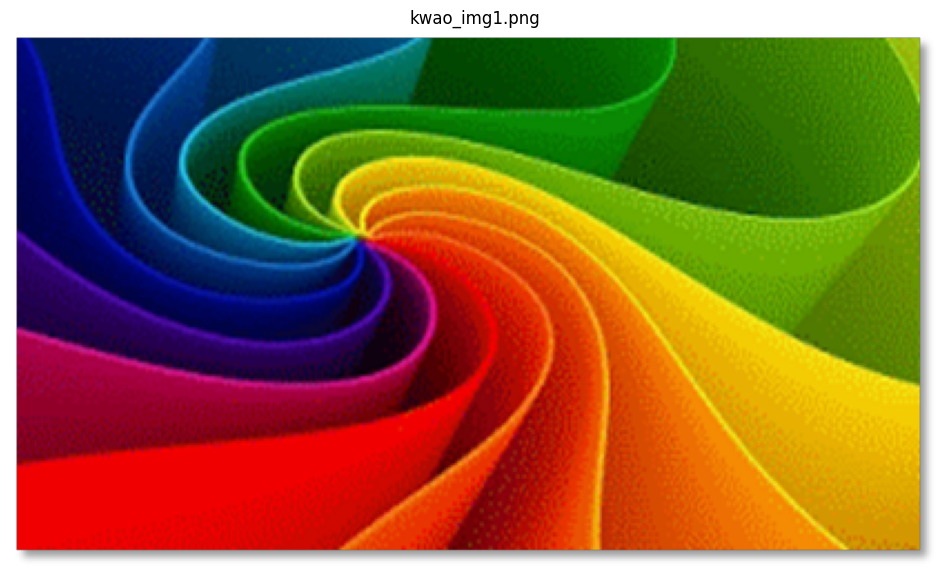

In [34]:
import io

buffer = io.BytesIO(response.content)
img = plt.imread(buffer)

_, ax = plt.subplots(figsize=(12, 9))
ax.imshow(img)
ax.set_axis_off()
ax.set_title(filename);

### Wysylanie danych do serwisu sieciowego - metoda POST

In [39]:
import json

data = {
  "userId": 1,
  "id": 1,
  "title": "PRM1T 20Z: wyklad 11",
  "body": "Python, requests"
}

response = requests.post("https://jsonplaceholder.typicode.com/posts", json=data)

In [40]:
response.status_code

201

In [41]:
response.request.headers

{'User-Agent': 'python-requests/2.29.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '83', 'Content-Type': 'application/json'}

In [42]:
response.headers

{'Date': 'Fri, 19 Jan 2024 09:53:39 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '95', 'Connection': 'keep-alive', 'Report-To': '{"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1705658019&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=qdQqqMW9a2AUifQ%2BKuuIVSdaSvpqi5vY0j6qBSvy2Q0%3D"}]}', 'Reporting-Endpoints': 'heroku-nel=https://nel.heroku.com/reports?ts=1705658019&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&s=qdQqqMW9a2AUifQ%2BKuuIVSdaSvpqi5vY0j6qBSvy2Q0%3D', 'Nel': '{"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}', 'X-Powered-By': 'Express', 'X-Ratelimit-Limit': '1000', 'X-Ratelimit-Remaining': '999', 'X-Ratelimit-Reset': '1705658077', 'Vary': 'Origin, X-HTTP-Method-Override, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Expires': '-1', 'Access-Control-Expose-Headers': 'Location',

In [43]:
response.content

b'{\n  "userId": 1,\n  "id": 101,\n  "title": "PRM1T 20Z: wyklad 11",\n  "body": "Python, requests"\n}'

In [44]:
response.json()

{'userId': 1,
 'id': 101,
 'title': 'PRM1T 20Z: wyklad 11',
 'body': 'Python, requests'}